In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('Q1_Sales_Data.csv')
# df = pd.read_excel('Q1_Sales_Data.xlsx')

df.to_csv("Q1_Sales_Data.csv")

# Preview the first few rows
df.shape

In [ ]:
# Check missing values
df.isna().sum()
# df.dtypes

Unnamed: 0.4     0
Unnamed: 0.3     0
Unnamed: 0.2     0
Unnamed: 0.1     0
Unnamed: 0       0
Date             0
Product          0
Region           0
CustomerID       0
Quantity         0
Sales           15
Revenue         15
dtype: int64

In [ ]:
# Handle missing values
df["Sales"] = df["Sales"].fillna(df["Sales"].mean())  # Fill missing values with the mean of the column
df["Revenue"] = df["Revenue"].fillna(df["Revenue"].mean())  # Fill missing values with the mean of the column

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month and Year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Remove duplicates
df.drop_duplicates(inplace=True)


In [ ]:
df

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,Product,Region,CustomerID,Quantity,Sales,Revenue,Month,Year
0,0,0,0,0,0,2025-02-16,Printer,East,CUST0065,8,146.77,1174.16,2,2025
1,1,1,1,1,1,2025-03-28,Monitor,South,CUST0032,3,587.17,1761.51,3,2025
2,2,2,2,2,2,2025-03-27,Keyboard,East,CUST0034,2,738.15,1476.30,3,2025
3,3,3,3,3,3,2025-01-02,Printer,West,CUST0092,1,883.87,883.87,1,2025
4,4,4,4,4,4,2025-01-17,Tablet,North,CUST0095,3,742.68,2228.04,1,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,500,500,500,500,2025-03-23,Smartphone,South,CUST0007,8,698.42,5587.36,3,2025
501,501,501,501,501,501,2025-03-08,Tablet,South,CUST0074,4,656.06,2624.24,3,2025
502,502,502,502,502,502,2025-02-26,Printer,South,CUST0052,8,472.72,3781.76,2,2025
503,503,503,503,503,503,2025-02-02,Laptop,West,CUST0079,1,104.45,104.45,2,2025


In [ ]:
df.isna().sum()
df.dtypes

Unnamed: 0.4             int64
Unnamed: 0.3             int64
Unnamed: 0.2             int64
Unnamed: 0.1             int64
Unnamed: 0               int64
Date            datetime64[ns]
Product                 object
Region                  object
CustomerID              object
Quantity                 int64
Sales                  float64
Revenue                float64
Month                    int32
Year                     int32
dtype: object

In [ ]:
# Summary statistics for numerical columns
summary_stats = df[['Sales', 'Revenue', 'Quantity']].describe()
summary_stats

# df.describe()

,Sales,Revenue,Quantity
count,505.000000,505.000000,505.000000
mean,551.856755,2708.478571,4.936634
std,257.898306,2036.354084,2.664423
min,104.450000,104.450000,1.000000
25%,322.390000,1047.450000,2.000000
50%,551.856755,2181.440000,5.000000
75%,759.800000,3895.570000,7.000000
max,999.470000,8995.230000,9.000000


In [ ]:
# Correlation matrix
correlation_matrix = df[['Sales', 'Revenue', 'Quantity']].corr()

correlation_matrix

,Sales,Revenue,Quantity
Sales,1.000000,0.582484,-0.047282
Revenue,0.582484,1.000000,0.685843
Quantity,-0.047282,0.685843,1.000000


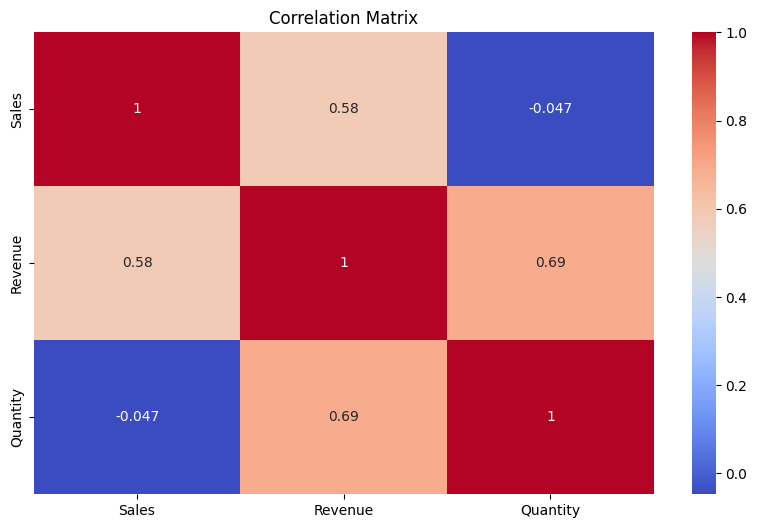

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Top 5 products by revenue
top_products = df.groupby('Product')['Revenue'].sum().nlargest(5)

top_products

Product
Laptop        239854.385714
Monitor       226049.975714
Printer       199308.367143
Tablet        193852.410000
Smartphone    186931.901429
Name: Revenue, dtype: float64

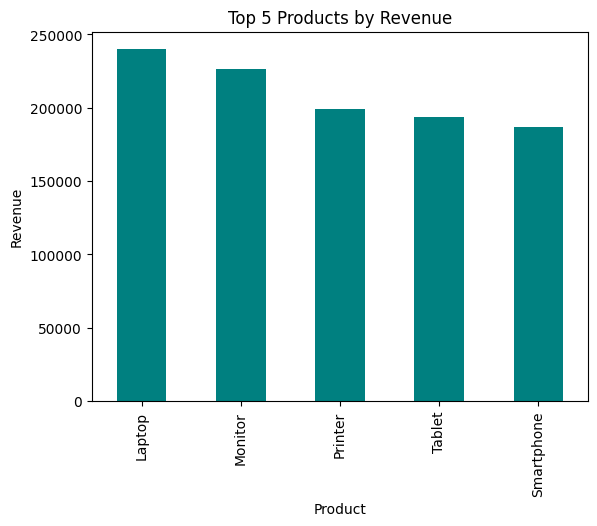

In [ ]:
# Plot the bar chart
top_products.plot(kind='bar', color='teal')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Monthly sales trend
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales

Month
1    98673.220265
2    80897.993776
3    99116.447286
Name: Sales, dtype: float64

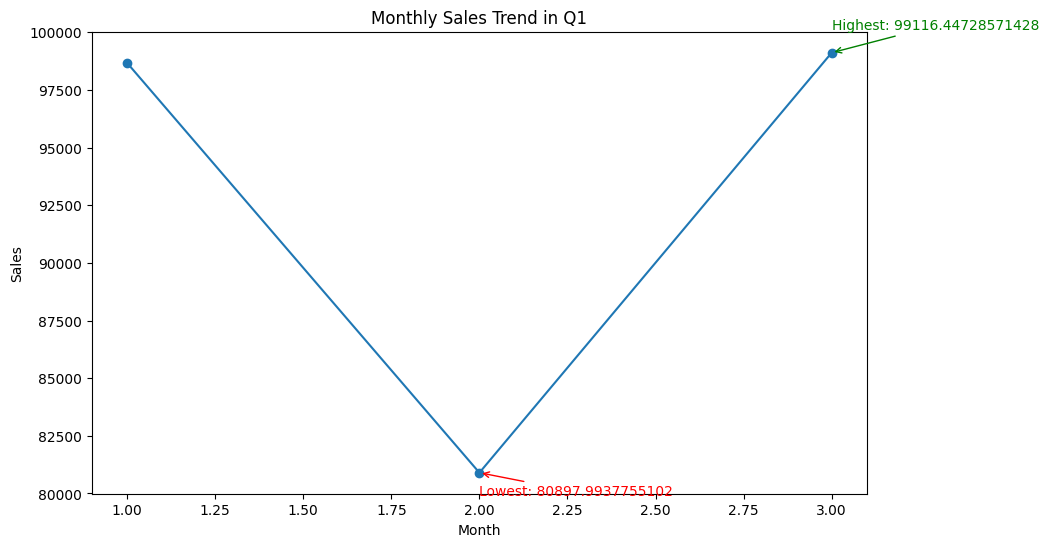

In [ ]:
# Plot the line chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend in Q1')
plt.xlabel('Month')
plt.ylabel('Sales')

# Annotate highest and lowest months
max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()


plt.annotate(
            f'Highest: {monthly_sales[max_month]}', 
            xy=(max_month, monthly_sales[max_month]), 
            xytext=(max_month, monthly_sales[max_month] + 1000),
            arrowprops=dict(arrowstyle='->', color='green'), 
            # arrowprops={'arrowstyle': '->', 'color': 'green'}, 
            color='green')
plt.annotate(
            f'Lowest: {monthly_sales[min_month]}', 
            xy=(min_month, monthly_sales[min_month]), 
            xytext=(min_month, monthly_sales[min_month] - 1000),
            arrowprops=dict(arrowstyle='->', color='red'), 
            color='red')

plt.show()

In [ ]:
# Sales by region
region_sales = df.groupby('Region')['Revenue'].sum()

region_sales

Region
East     302183.095714
North    433282.155714
South    332450.984286
West     299865.442857
Name: Revenue, dtype: float64

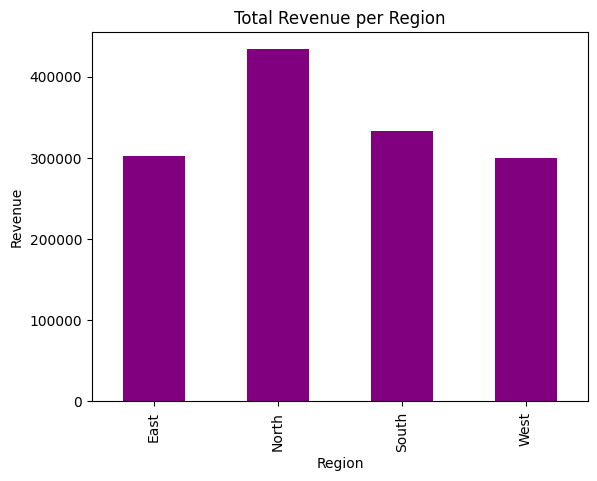

The region with the highest sales is North with a revenue of 433282.15571428573.


In [ ]:
# Plot the bar chart
region_sales.plot(kind='bar', color='purple')
plt.title('Total Revenue per Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

# Identify region with highest sales growth
growth_region = region_sales.idxmax()
growth_value = region_sales.max()
print(f'The region with the highest sales is {growth_region} with a revenue of {growth_value}.')

In [ ]:
df

In [ ]:
# Customer Behavior Classification
customer_data = df.groupby('CustomerID').agg({
    'Sales': 'count',
    'Revenue': 'mean'
}).rename(columns={'Sales': 'PurchaseFrequency', 'Revenue': 'AvgOrderValue'})

customer_data

,PurchaseFrequency,AvgOrderValue
CustomerID,,
CUST0001,7,2485.520000
CUST0002,5,2032.668000
CUST0003,4,3560.957143
CUST0004,6,2716.118333
CUST0005,10,2124.542000
...,...,...
CUST0096,2,2183.605000
CUST0097,8,3924.928750
CUST0098,4,2202.885000


In [ ]:
# Mannual classification
def classify_customer(row):
    if row['AvgOrderValue'] >= 500 and row['PurchaseFrequency'] >= 5:
        return 'High Value'
    elif row['AvgOrderValue'] >= 200:
        return 'Medium Value'
    else:
        return 'Low Value'

# Apply the function to classify customers
customer_data['Category'] = customer_data.apply(classify_customer, axis=1)

customer_data

# Count the number of customers in each category
category_counts = customer_data['Category'].value_counts()

category_counts

Category
High Value      51
Medium Value    48
Name: count, dtype: int64

In [ ]:
customer_data

,PurchaseFrequency,AvgOrderValue,Category
CustomerID,,,
CUST0001,7,2485.520000,High Value
CUST0002,5,2032.668000,High Value
CUST0003,4,3560.957143,Medium Value
CUST0004,6,2716.118333,High Value
CUST0005,10,2124.542000,High Value
...,...,...,...
CUST0096,2,2183.605000,Medium Value
CUST0097,8,3924.928750,High Value
CUST0098,4,2202.885000,Medium Value


High Value customers: 51
Medium Value customers: 48


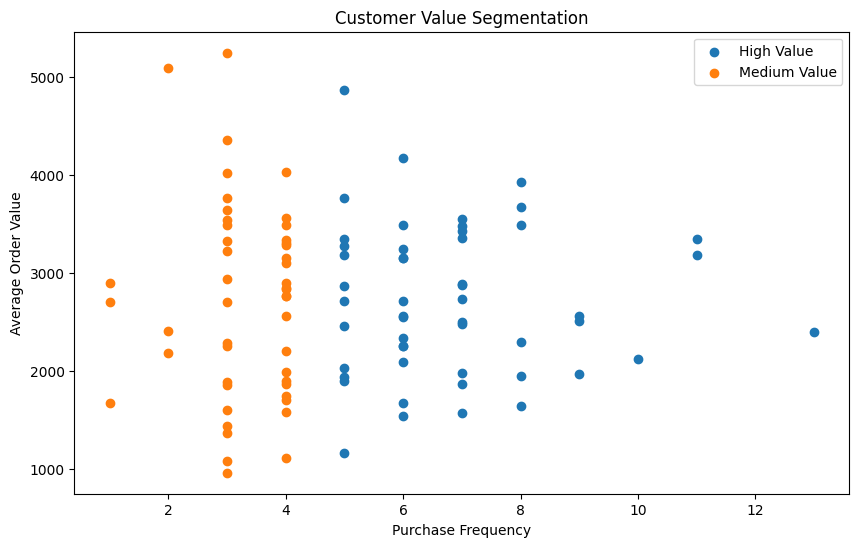

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))

for label, group in customer_data.groupby('Category'):
    print(f'{label} customers: {len(group)}')
    plt.scatter(group['PurchaseFrequency'], group['AvgOrderValue'], label=label)

plt.xlabel('Purchase Frequency')
plt.ylabel('Average Order Value')
plt.title('Customer Value Segmentation')
plt.legend()
plt.show()

# customer_data.groupby("Category")["AvgOrderValue"].sum()